In [270]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

In [271]:
def trim_image(file):
    img = cv2.imread(file)
    plt.figure()
    plt.title('Original')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img = img[60:135,:,:]
    plt.figure()
    plt.title('Trimmed')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return img

def threshold_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    sensitivity = 50
    lower_gray = np.array([0,0,50])
    upper_gray = np.array([255,80,255])
    mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)
    res = cv2.bitwise_and(img,img, mask= mask_gray)
    plt.figure()
    plt.title('Threshold')
    plt.imshow(res)
    return res

def grayscale_image(img):
    #b,g,r = cv2.split(img)
    #plt.figure(); plt.imshow(r, cmap='gray')
    #plt.figure(); plt.imshow(g, cmap='gray')
    #plt.figure(); plt.imshow(b, cmap='gray')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.figure(); plt.title('Gray')
    plt.imshow(img, cmap='gray')
    return img

def normalize_image(img):
    img = (img/255.)*2 - 1
    plt.figure(); plt.title('Normalize');
    plt.imshow(img, cmap='gray')
    return img

def resize_image(img):
    img = cv2.resize(img, (100, 25))
    plt.figure(); plt.title('Resize');
    plt.imshow(img, cmap='gray')
    return img

/Users/SandeepGangundi/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


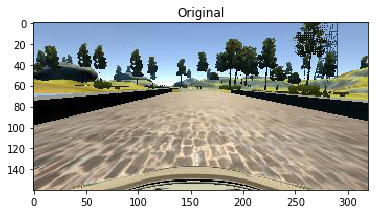

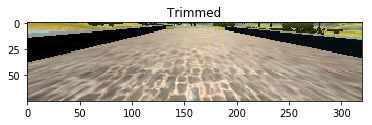

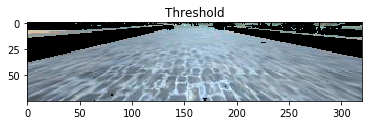

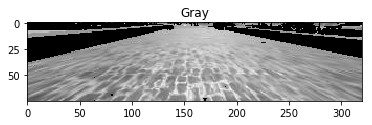

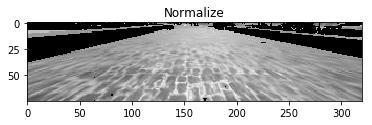

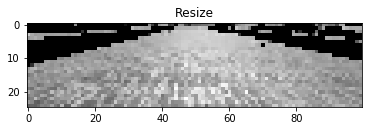

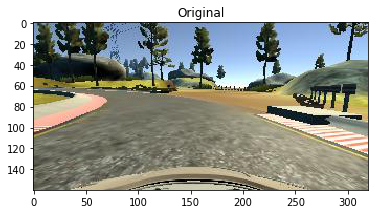

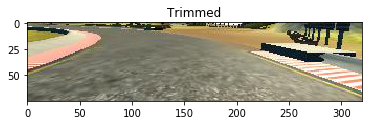

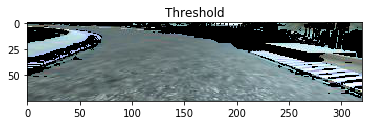

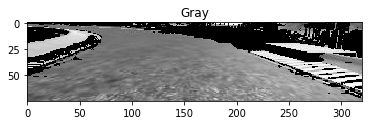

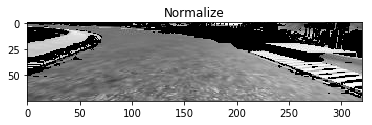

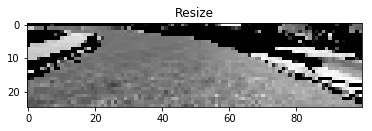

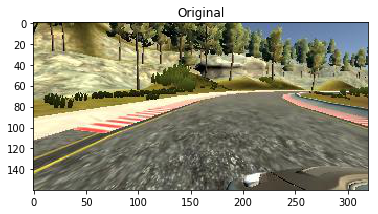

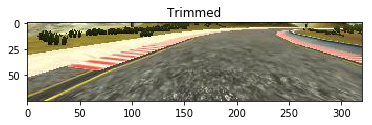

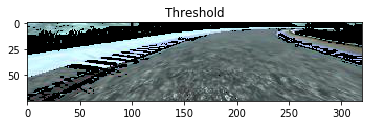

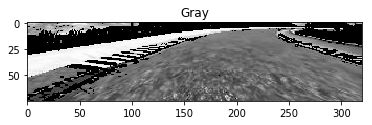

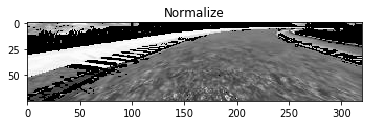

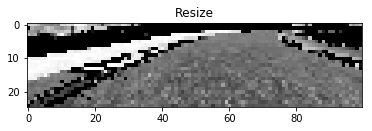

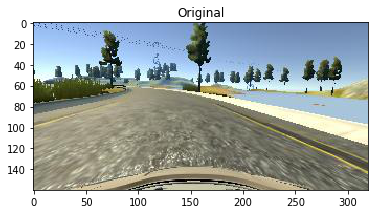

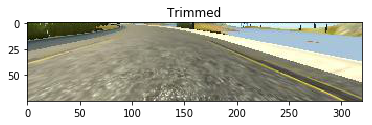

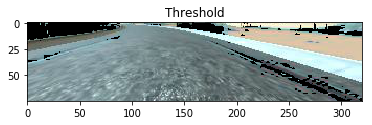

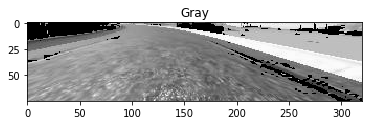

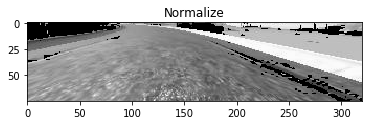

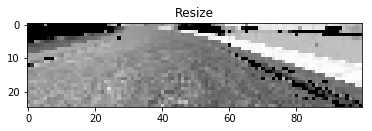

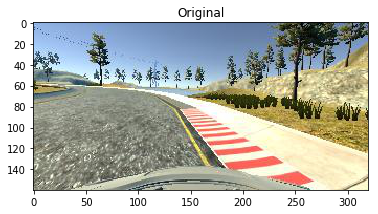

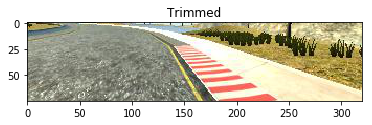

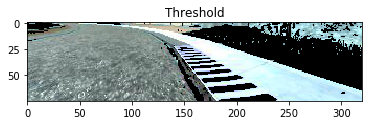

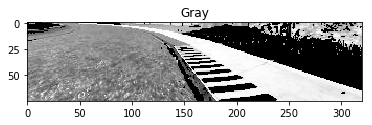

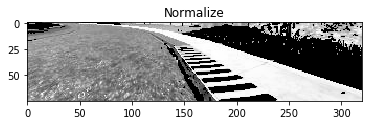

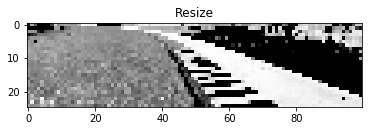

In [273]:
file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_30_48_287.jpg'
img = trim_image(file)
img = threshold_image(img)
img = grayscale_image(img)
img = normalize_image(img)
img = resize_image(img)
file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_31_13_584.jpg'
img = trim_image(file)
img = threshold_image(img)
img = grayscale_image(img)
img = normalize_image(img)
img = resize_image(img)
file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/left_2016_12_01_13_35_53_273.jpg'
img = trim_image(file)
img = threshold_image(img)
img = grayscale_image(img)
img = normalize_image(img)
img = resize_image(img)
file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_41_47_496.jpg'
img = trim_image(file)
img = threshold_image(img)
img = grayscale_image(img)
img = normalize_image(img)
img = resize_image(img)
file = '/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/myDrivingData/IMG/center_2017_02_07_23_03_52_629.jpg'
img = trim_image(file)
img = threshold_image(img)
img = grayscale_image(img)
img = normalize_image(img)
img = resize_image(img)


In [240]:
def read_image(img_paths):
    imgs = np.empty([len(img_paths), 160, 320, 3], dtype=np.uint8)
    for i, path in enumerate(img_paths):
        print('Reading file', path)
        imgs[i] = mpimg.imread(path, 1)
        print(type(imgs[i]))
    return imgs

def trim_image(imgs):
    #img = cv2.imread(file)
    imgs = imgs[:,60:135,:,:]
    return imgs

def threshold_image(imgs):
    imgs_thresh = np.empty([len(imgs), 75, 320])
    for i, img in enumerate(imgs):
        #print(img.shape)
        print(img.shape)
        plt.figure(); plt.imshow(img)
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        lower_gray = np.array([0,0,50])
        upper_gray = np.array([255,80,255])
        mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        res = cv2.bitwise_and(gray,gray, mask= mask_gray)
        plt.figure(); plt.title('after thresh'); plt.imshow(res, cmap='gray')
        imgs_thresh[i] = res
    print(imgs_thresh.shape)
    return imgs_thresh

def grayscale_image(imgs):
    print('inside grayscale')
    print(imgs.shape)
    imgs_gray = np.empty([len(imgs), 75, 320, 1])
    for i in range(len(imgs)):
        print(imgs[i].shape)
        print(type(imgs[i]))
        #plt.figure(); plt.imshow(imgs[i])
        gray = cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY)
        imgs_gray[i] = gray
    return imgs_gray
    #return np.mean(imgs, axis=3, keepdims=True)

def normalize_image(imgs):
    imgs = (imgs/255.)*2 - 1
    return imgs

def resize_image(imgs):
    imgs_resized = np.empty([len(imgs), 25, 100])
    for i, img in enumerate(imgs):
        imgs_resized[i] = cv2.resize(img, (100, 25))
    return imgs_resized

def preprocess_batch(img_paths):
    imgs = read_image(img_paths)
    imgs = trim_image(imgs)
    imgs = threshold_image(imgs)
    imgs = grayscale_image(imgs)
    imgs = normalize_image(imgs)
    imgs = resize_image(imgs)
    return imgs

In [266]:
import numpy as np
import matplotlib.image as mpimg
import cv2

######################################
###### PREPROCESSING FUNCTIONS #######
######################################

def read_images(img_paths):
    imgs = np.empty([len(img_paths), 160, 320, 3], dtype=np.uint8)
    for i, path in enumerate(img_paths):
        print('Reading file', path)
        imgs[i] = mpimg.imread(path, 1)
    return imgs

def trim_images(imgs):
    #img = cv2.imread(file)
    imgs = imgs[:,60:135,:,:]
    return imgs

def threshold_images(imgs):
    imgs_thresh = np.empty([len(imgs), 75, 320])
    for i, img in enumerate(imgs):
        print(img.shape)
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        lower_gray = np.array([0,0,50])
        upper_gray = np.array([255,80,255])
        mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        res = cv2.bitwise_and(gray, gray, mask=mask_gray)
        imgs_thresh[i] = res
    return imgs_thresh

def normalize_images(imgs):
    imgs = (imgs/255.)*2 - 1
    return imgs

def resize_images(imgs):
    imgs_resized = np.empty([len(imgs), 25, 100])
    for i, img in enumerate(imgs):
        imgs_resized[i] = cv2.resize(img, (100, 25))
    return imgs_resized

def preprocess_batch(img_paths):
    imgs = read_images(img_paths)
    imgs = trim_images(imgs)
    imgs = threshold_images(imgs)
    imgs = normalize_images(imgs)
    imgs = resize_images(imgs)
    print(imgs.shape)
    print(imgs[0])
    imgs = imgs.reshape(imgs.shape[0], 25, 100, 1)
    print(imgs.shape)
    print(imgs[0])
    return imgs

def process_batch(imgs, steerings, batch_size):
    size_images = len(imgs)

    while True:
        batch = np.random.choice(size_images, batch_size)
        batch_imgs, batch_steerings = preprocess_batch(imgs[batch]), steerings[batch].astype(float)
        yield batch_imgs, batch_angles

(2,)
Reading file /Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_30_48_287.jpg
Reading file /Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_31_13_584.jpg
(75, 320, 3)
(75, 320, 3)
(2, 25, 100)
[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-1.         -1.         -1.         ...,  0.2745098   0.2854902
   0.27921569]
 [-1.         -1.         -1.         ..., -1.          0.1654902
   0.07921569]
 ..., 
 [-0.13803922 -0.02745098  0.41176471 ...,  0.3254902   0.12784314
   0.07843137]
 [ 0.13411765  0.01019608 -0.2745098  ..., -0.03137255  0.01960784
   0.2054902 ]
 [-0.28705882 -0.24392157 -0.27058824 ...,  0.20392157  0.24862745
  -0.04156863]]
(2, 25, 100, 1)
[[[-1.        ]
  [-1.        ]
  [-1.        ]
  ..., 
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.

TypeError: Invalid dimensions for image data

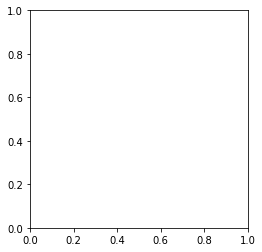

In [267]:
img_paths = ['/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_30_48_287.jpg',
             '/Users/SandeepGangundi/Documents/Courses/Udacity/Self_Driving_Car_ND/Term1/Udacity-CarND-Behavioural-Cloning/data/IMG/center_2016_12_01_13_31_13_584.jpg']
img_paths = np.asarray(img_paths)
print(img_paths.shape)
processed_imgs = preprocess_batch(img_paths)
#imgs = read_images(img_paths)
#imgs = trim_images(imgs)
#imgs = threshold_images(imgs)
#imgs = normalize_image(imgs)
#imgs = resize_image(imgs)
for i, img in enumerate(processed_imgs):
    plt.figure()
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img)
    
    plt.imshow(img, cmap='gray')